In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('perfect_dataset.csv')
#df_new = pd.read_csv('perfect_dataset_cleaned.csv')
#df_new.tag.value_counts()

In [5]:
from bs4 import BeautifulSoup
import re
!pip install emoji
import emoji
import string
punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
         '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥️', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
         '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
         '▒', '：', '¼', '⊕', '▼', '▪️', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦️', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
         '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤️', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-',
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''
    for p in mapping:
        text = text.replace(p, mapping[p])

    for p in punct:
        text = text.replace(p, f' {p} ')

    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])

    return text


def remove_space(text):
    '''Removes awkward spaces'''
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_special_chars(text, punct, punct_mapping)
    text = remove_space(text)
    return text

df.text = df.text.apply(text_preprocessing_pipeline)

C:\Users\amirc\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
df_new = df
df_new.text = df_new.text.str.replace('i \' m' , '')
df_new.text = df_new.text.str.replace(' s ' , '')
df_new.text = df_new.text.str.replace(' don \' t ' , '')
df_new.text = df_new.text.str.replace(' ll ' , '')
df_new.text = df_new.text.str.replace(' m ' , '')
df_new.text = df_new.text.str.replace(' re ' , '')
df_new.to_csv('perfect_dataset_cleaned.csv', index=False)

In [7]:
rap_lyrics = ''.join(list(df_new[df_new.tag == 'rap'].text))
rock_lyrics = ''.join(list(df_new[df_new.tag == 'rock'].text))
rb_lyrics = ''.join(list(df_new[df_new.tag == 'rb'].text))
metal_lyrics = ''.join(list(df_new[df_new.tag == 'metal'].text))
pop_lyrics = ''.join(list(df_new[df_new.tag == 'pop'].text))

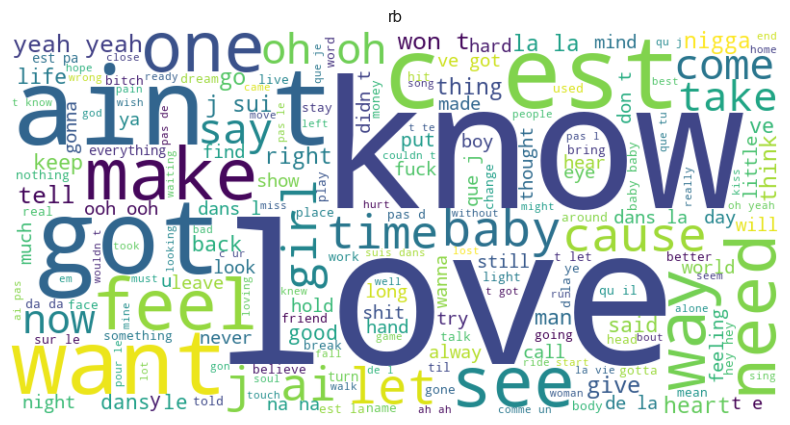

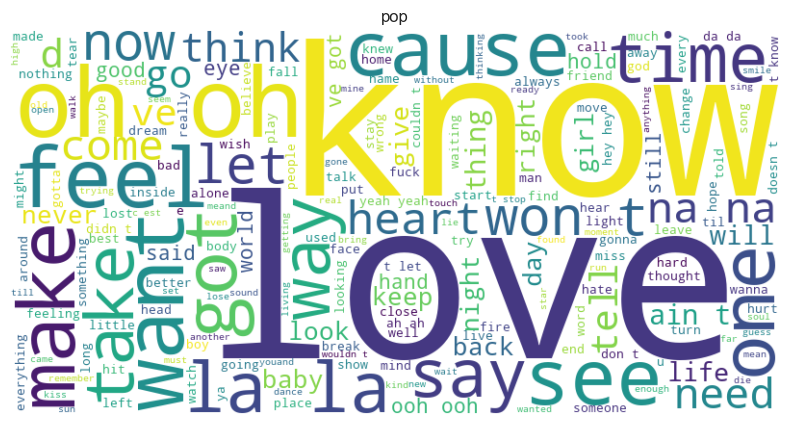

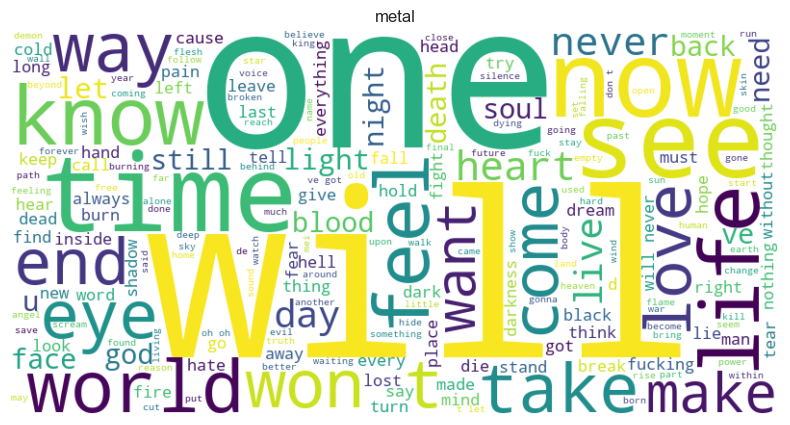

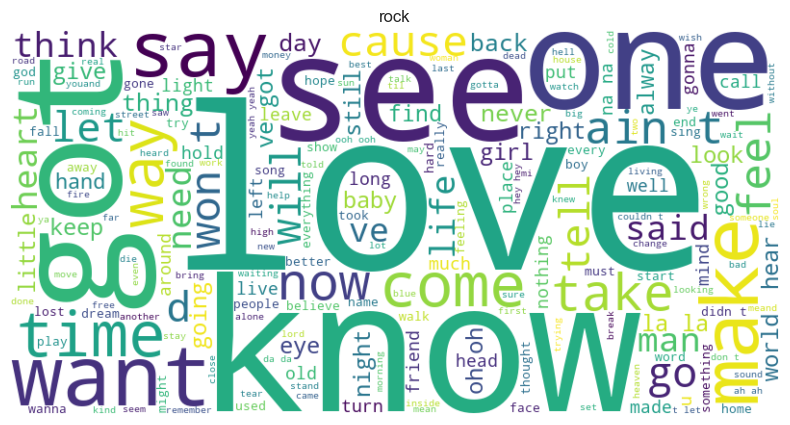

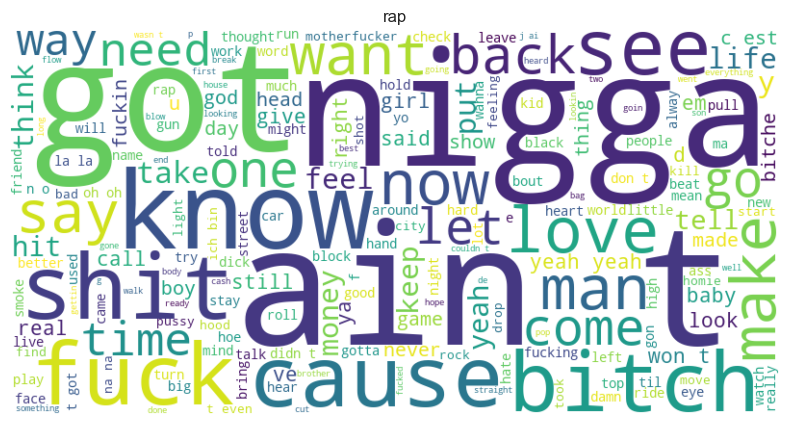

In [8]:
#!pip install stylecloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
rb_wc = WordCloud(width=800, height=400, background_color='white').generate(rb_lyrics)

pop_wc = WordCloud(width=800, height=400, background_color='white').generate(pop_lyrics)
metal_wc = WordCloud(width=800, height=400, background_color='white').generate(metal_lyrics)
rock_wc = WordCloud(width=800, height=400, background_color='white').generate(rock_lyrics)
rap_wc = WordCloud(width=800, height=400, background_color='white').generate(rap_lyrics)
plt.figure(figsize=(10, 5))
plt.imshow(rb_wc, interpolation='bilinear')
plt.axis('off')
plt.title('rb')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(pop_wc, interpolation='bilinear')
plt.axis('off')
plt.title('pop')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(metal_wc, interpolation='bilinear')
plt.axis('off')
plt.title('metal')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(rock_wc, interpolation='bilinear')
plt.axis('off')
plt.title('rock')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(rap_wc, interpolation='bilinear')
plt.axis('off')
plt.title('rap')
plt.show()


In [9]:
from textblob import TextBlob
import pandas as pd
import numpy as np
rap_lyrics = list(df_new[df_new.tag == 'rap'].text)
rock_lyrics = list(df_new[df_new.tag == 'rock'].text)
rb_lyrics = list(df_new[df_new.tag == 'rb'].text)
metal_lyrics = list(df_new[df_new.tag == 'metal'].text)
pop_lyrics = list(df_new[df_new.tag == 'pop'].text)
rap_sentiment = {'pos':[0],'neut':[0],'neg':[0]}
rock_sentiment = {'pos':[0],'neut':[0],'neg':[0]}
rb_sentiment = {'pos':[0],'neut':[0],'neg':[0]}
metal_sentiment = {'pos':[0],'neut':[0],'neg':[0]}
pop_sentiment = {'pos':[0],'neut':[0],'neg':[0]}
for i in rap_lyrics:
    blob = TextBlob(i)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score >= 0.2:
        rap_sentiment['pos'][0] += 1
    elif sentiment_score <= -0.2:
        rap_sentiment['neg'][0] += 1
    else:
        rap_sentiment['neut'][0] += 1
for i in rock_lyrics:
    blob = TextBlob(i)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score >= 0.2:
        rock_sentiment['pos'][0] += 1
    elif sentiment_score <= -0.2:
        rock_sentiment['neg'][0] += 1
    else:
        rock_sentiment['neut'][0] += 1
for i in rb_lyrics:
    blob = TextBlob(i)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score >= 0.2:
        rb_sentiment['pos'][0] += 1
    elif sentiment_score <= -0.2:
        rb_sentiment['neg'][0] += 1
    else:
        rb_sentiment['neut'][0] += 1
for i in metal_lyrics:
    blob = TextBlob(i)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score >= 0.2:
        metal_sentiment['pos'][0] += 1
    elif sentiment_score <= -0.2:
        metal_sentiment['neg'][0] += 1
    else:
        metal_sentiment['neut'][0] += 1
for i in pop_lyrics:
    blob = TextBlob(i)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score >= 0.2:
        pop_sentiment['pos'][0] += 1
    elif sentiment_score <= -0.2:
        pop_sentiment['neg'][0] += 1
    else:
        pop_sentiment['neut'][0] += 1



{'pos': [9100], 'neut': [23975], 'neg': [1925]}
{'pos': [4560], 'neut': [28055], 'neg': [2385]}
{'pos': [11687], 'neut': [21041], 'neg': [2272]}
{'pos': [9087], 'neut': [23916], 'neg': [1997]}
{'pos': [4962], 'neut': [25462], 'neg': [4576]}


<AxesSubplot:xlabel='tag'>

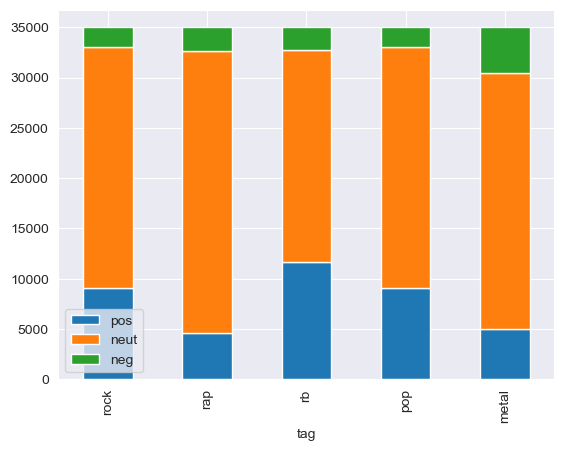

In [10]:
print(rock_sentiment)
print(rap_sentiment)
print(rb_sentiment)
print(pop_sentiment)
print(metal_sentiment)
bar_df = pd.concat([pd.DataFrame({'tag':['rock']}),pd.DataFrame(rock_sentiment)],axis=1)
bar_df = pd.concat([bar_df,pd.concat([pd.DataFrame({'tag':['rap']}),pd.DataFrame(rap_sentiment)],axis=1)])
bar_df = pd.concat([bar_df,pd.concat([pd.DataFrame({'tag':['rb']}),pd.DataFrame(rb_sentiment)],axis=1)])
bar_df = pd.concat([bar_df,pd.concat([pd.DataFrame({'tag':['pop']}),pd.DataFrame(pop_sentiment)],axis=1)])
bar_df = pd.concat([bar_df,pd.concat([pd.DataFrame({'tag':['metal']}),pd.DataFrame(metal_sentiment)],axis=1)])
bar_df.plot.bar(x='tag', stacked=True)


Done


<AxesSubplot:xlabel='tag'>

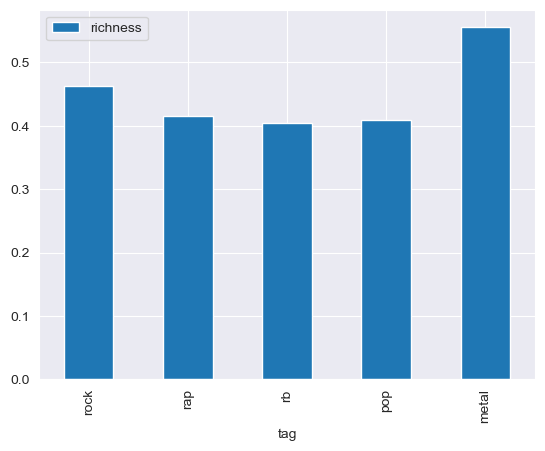

In [19]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()

rock_richness = 0
for lyric in rock_lyrics:
    all_text = lyric
    if len(all_text) == 0:
        continue
    words = word_tokenize(all_text)
    stemmed_words = [porter.stem(word) for word in words]
    # Split the string into individual words
    all_words = stemmed_words
    
    # Calculate count of all words
    total_word_count = len(all_words)
    unique_word_count = len(set(all_words))
    rock_richness += unique_word_count / total_word_count
rock_richness /= len(rock_lyrics)
print('Done')
rap_richness = 0
for lyric in rap_lyrics:
    all_text = lyric
    if len(all_text) == 0:
        continue
    words = word_tokenize(all_text)
    stemmed_words = [porter.stem(word) for word in words]
    # Split the string into individual words
    all_words = stemmed_words
    # Split the string into individual words
    
    # Calculate count of all words
    total_word_count = len(all_words)
    unique_word_count = len(set(all_words))
    # Calculate count of unique words
    rap_richness += unique_word_count / total_word_count
rap_richness /= len(rap_lyrics)
rb_richness = 0
for lyric in rb_lyrics:
    all_text = lyric
    if len(all_text) == 0:
        continue
    words = word_tokenize(all_text)
    stemmed_words = [porter.stem(word) for word in words]
    # Split the string into individual words
    # Split the string into individual words
    all_words = all_text.split()
    
    # Calculate count of all words
    total_word_count = len(all_words)
    unique_word_count = len(set(all_words))
    # Calculate count of unique words
    rb_richness += unique_word_count / total_word_count
rb_richness /= len(rb_lyrics)
pop_richness = 0
for lyric in pop_lyrics:
    all_text = lyric
    if len(all_text) == 0:
        continue
    words = word_tokenize(all_text)
    stemmed_words = [porter.stem(word) for word in words]
    # Split the string into individual words
    all_words = stemmed_words
    
    # Calculate count of all words
    total_word_count = len(all_words)
    unique_word_count = len(set(all_words))
    # Calculate count of unique words
    pop_richness += unique_word_count / total_word_count
pop_richness /= len(pop_lyrics)
metal_richness = 0
for lyric in metal_lyrics:
    all_text = lyric
    if len(all_text) == 0:
        continue
    words = word_tokenize(all_text)
    stemmed_words = [porter.stem(word) for word in words]
    # Split the string into individual words
    all_words = stemmed_words
    
    # Calculate count of all words
    total_word_count = len(all_words)
    unique_word_count = len(set(all_words))
    # Calculate count of unique words
    metal_richness += unique_word_count / total_word_count
metal_richness /= len(metal_lyrics)
richness_df = pd.DataFrame({'tag': ['rock', 'rap', 'rb', 'pop', 'metal'],
                            'richness': [rock_richness,
                                         rap_richness,
                                         rb_richness,
                                         pop_richness,
                                         metal_richness]})

richness_df.plot.bar(x='tag', stacked=True)
#richness_df